In [1]:
import os
import struct
import rawutil
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

aux = np.load(os.path.join('data', 'AUX.npy'))
eeg = np.load(os.path.join('data', 'EEG.npy'))

In [2]:
eeg.shape

(200, 24)

# Deserialization

## AUX

### ```rawutil```

In [ ]:
%%timeit
np.array([[rawutil.unpack('>H', bytes(ch))[0] for ch in row.reshape(-1, 2).tolist()][:2] for row in aux])

2.51 ms ± 21 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### ```struct```

In [22]:
%%timeit
np.array([struct.unpack('>hhh', a.astype('i1').tobytes())[:2] for a in aux])

183 µs ± 503 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
(ra-sa).max()

0

## EEG

### ```rawutil```

In [23]:
%%timeit
np.array([[rawutil.unpack('>u', bytes(ch))[0] for ch in row.reshape(-1, 3).tolist()] for row in eeg])

6.39 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### ```struct```

In [24]:
%%timeit
np.array([struct.unpack('>i', (b'\0' if chunk[0] < 128 else b'\xff') + chunk) for chunk in [bytes(ch.tolist()) for ch in eeg.reshape(-1, 3)]]).reshape(-1, 8)

903 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
(re-se).max()

0

## Graphically deserialization

/tmp/ipykernel_14845/1171294646.py:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  current_cmap.set_bad(color='white')


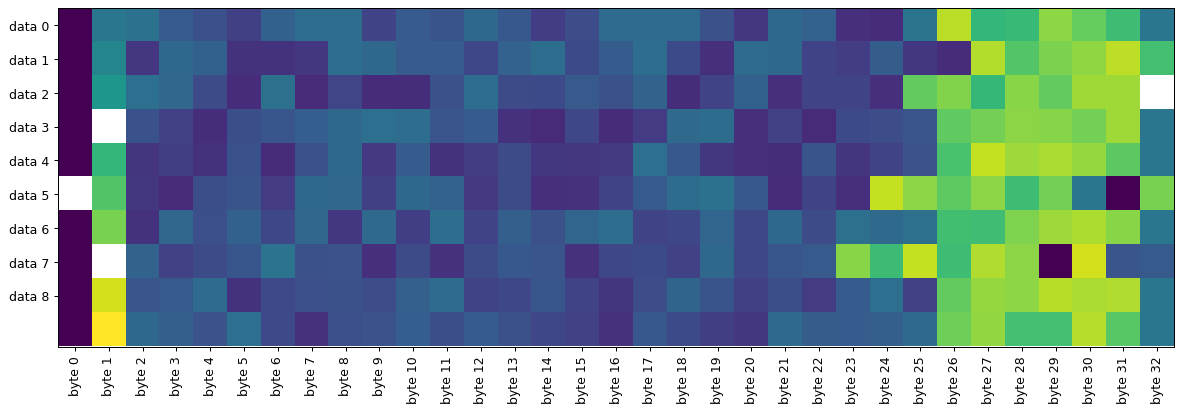

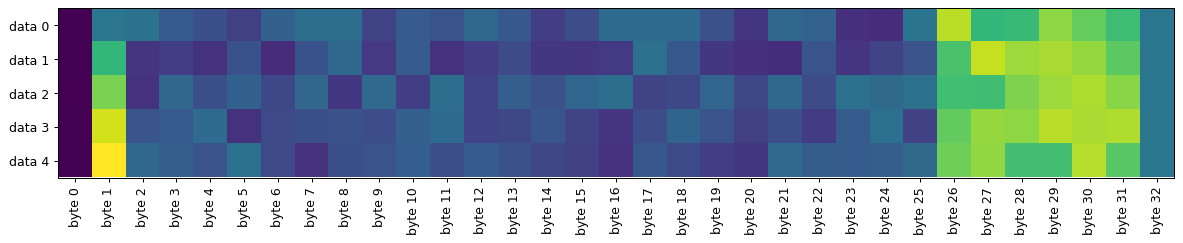

In [263]:
N = 10
S = 30

data = np.array([[1, 0] + [0]*24 + [0]*6 + [30]]*N).astype(float)
data[:,2:26] = 10 + np.random.random(size=(N, 24))*20
data[:,26:32] = 50 + np.random.random(size=(N, 6))*20
data[:,1] = np.arange(S, S+N*5, 5)

data[2,5:-2] = data[2,6:-1]
data[5,7:-2] = data[5,9:]
data[7,5:-3] = data[7,8:]
data[1,6:] = data[1,5:-1]

data[2,-1:] = data[3,:1]
data[5,-2:] = data[6,:2]
data[7,-4:] = data[8,:4]

data[5,0] = np.nan
data[3,1] = np.nan
data[7,1] = np.nan
data[2,-1] = np.nan

current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='white')


plt.figure(figsize=(16, 9), dpi=90)
plt.imshow(data, aspect='auto')
plt.axis('scaled')
plt.yticks(range(9), [f'data {i}' for i in range(9)], rotation=0)
plt.xticks(range(33), [f'byte {i}' for i in range(33)], rotation=90)
plt.savefig('deserialization_0.svg', bbox_inches='tight')

plt.figure(figsize=(16, 9), dpi=90)
for r in [7, 5, 3, 2, 1]:
    data = np.delete(data, r, 0)
plt.imshow(data, aspect='auto')
plt.axis('scaled')
plt.yticks(range(5), [f'data {i}' for i in range(5)], rotation=0)
plt.xticks(range(33), [f'byte {i}' for i in range(33)], rotation=90)
plt.savefig('deserialization_1.svg', bbox_inches='tight')

